In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from IPython.display import display
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16

In [3]:
df = pd.read_csv("results/analyzed_models.csv")
df["zeta_eta_ratio"] = df.zeta / df.eta
df["rho_nu_ratio"] = df.rho / df.nu
display(df)

,rho,nu,zeta,eta,gamma,c,oc,oo,nc,no,y,r,h,g,zeta_eta_ratio,rho_nu_ratio
0,8,7,0.1,0.1,0.987268,0.196063,0.051369,0.240595,0.045869,0.662167,0.608847,0.633278,0.981648,0.394179,1.000000,1.142857
1,8,8,0.1,0.1,0.978599,0.172802,0.038495,0.218473,0.043370,0.699663,0.616570,0.700754,0.982273,0.384501,1.000000,1.000000
2,6,7,0.1,0.1,0.999605,0.191363,0.039870,0.190226,0.044994,0.724909,0.630057,0.721563,0.982694,0.378216,1.000000,0.857143
3,5,5,0.1,0.1,0.991964,0.235169,0.062367,0.213348,0.067117,0.657168,0.610194,0.670966,0.979811,0.402842,1.000000,1.000000
4,9,5,0.1,0.1,0.987136,0.258591,0.124609,0.290089,0.075866,0.509436,0.568969,0.685129,0.976860,0.445454,1.000000,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,4,1.0,0.6,0.986686,0.254833,0.062742,0.151731,0.085864,0.699663,0.582475,0.660029,0.980010,0.417274,1.666667,0.500000
9996,2,4,1.0,0.7,0.986576,0.258802,0.063492,0.142482,0.089364,0.704662,0.589354,0.592243,0.980225,0.413206,1.428571,0.500000
9997,2,4,1.0,0.8,0.984355,0.265101,0.052243,0.145607,0.086114,0.716035,0.599539,0.681170,0.981287,0.411607,1.250000,0.500000
9998,2,4,1.0,0.9,1.005921,0.265850,0.047244,0.137358,0.080490,0.734908,0.611165,0.669456,0.981107,0.393287,1.111111,0.500000


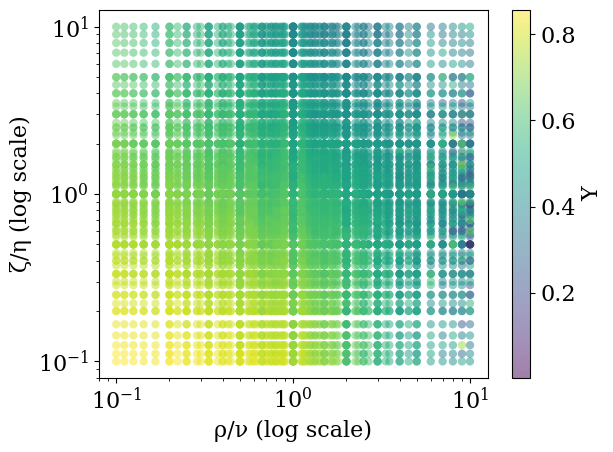

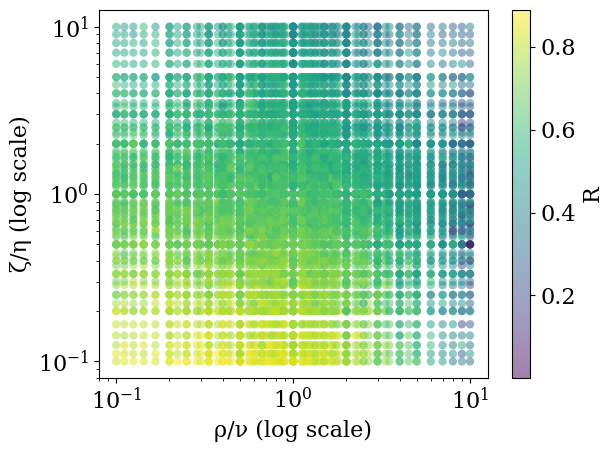

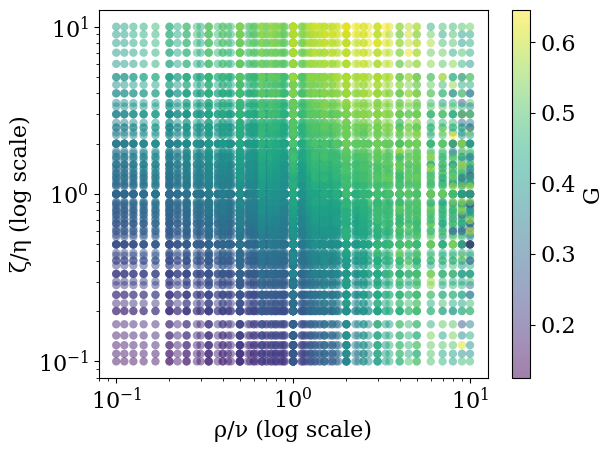

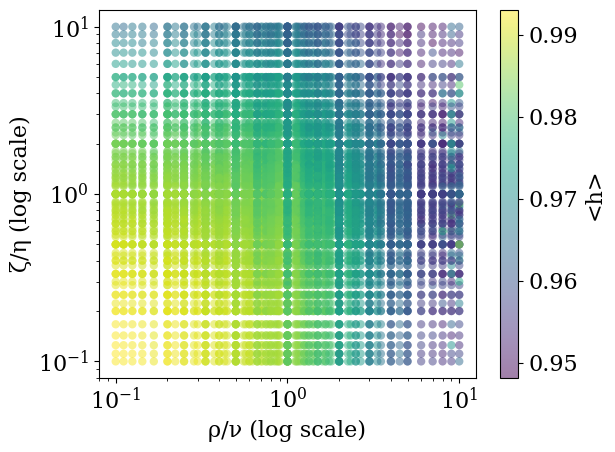

In [4]:
import shutil
import os

out_dir = "results/imgs/param_map"
shutil.rmtree(out_dir, ignore_errors=True)
os.makedirs(out_dir, exist_ok=True)

metrics_dict = {
    "y": "Y",
    "r": "R",
    "g": "G",
    "h": "<h>",
}

for metrics, metrics_label in metrics_dict.items():

    plt.scatter(x=df.rho_nu_ratio, y=df.zeta_eta_ratio, c=df[metrics], alpha=0.5, linewidths=0)
    cb: Colorbar = plt.colorbar()
    cb.set_label(metrics_label)
    plt.xlabel("ρ/ν (log scale)")
    plt.ylabel("ζ/η (log scale)")
    plt.xscale("log")
    plt.yscale("log")

    plt.tight_layout()
    plt.savefig(f"{out_dir}/{metrics}.png", dpi=300)
    plt.savefig(f"{out_dir}/{metrics}.pdf")
    plt.show()